In [1]:
import pandas as pd

In [2]:
TEST_POOL_ADDR = ['0x11b815efb8f581194ae79006d24e0d814b7697f6',
             '0x4e68ccd3e89f51c3074ca5072bbac773960dfa36',
             '0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5',
             '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
             '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8',
             '0x99ac8ca7087fa4a2a1fb6357269965a2014abc35',
             '0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8',
             ]

In [3]:
UNISWAP_NFT_MANAGER = "0xc36442b4a4522e871399cd717abdd847ab11fe88"
UNISWAP_MIGRATOR = '0xa5644e29708357803b5a882d272c41cc0df92b34'

NameError: name 'os' is not defined

In [5]:
df = pd.DataFrame()
temp_dfs = []
for pool_addr in TEST_POOL_ADDR:
    temp_df = pd.read_csv(f'../../data/01_original_data/lp_data/{pool_addr}_fixed.csv', low_memory=False)
    temp_dfs.append(temp_df)
    df = pd.concat([df, temp_df])

In [6]:
df_test = df.query(f'nf_position_manager_address != "{UNISWAP_NFT_MANAGER}"')

In [8]:
df["block_number"].max()

16308144

In [7]:
unique_token_addresses = ['0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
 '0xdac17f958d2ee523a2206206994597c13d831ec7',
'0x2b591e99afe9f32eaa6214f7b7629768c40eeb39',
'0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
'0x2260fac5e5542a773aa44fbcfedf7c193bc2c599',
'0x6b175474e89094c44da98b954eedeac495271d0f']

In [9]:
df_test["nf_position_manager_address"].nunique()

231

In [10]:
# pd.DataFrame(df_test["nf_position_manager_address"].unique()).to_csv("nf_position_manager_address.csv", index=False)
df.columns

Index(['blockchain', 'block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_address', 'token1_address', 'token0_symbol', 'token1_symbol',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'pool_address', 'pool_name', 'tick_lower', 'tick_upper',
       'price_lower_1_0', 'price_upper_1_0', 'price_lower_0_1',
       'price_upper_0_1', 'price_lower_1_0_usd', 'price_upper_1_0_usd',
       'price_lower_0_1_usd', 'price_upper_0_1_usd', 'tx_fee', 'from_address',
       'to_address', 'token_id', 'Unnamed: 0'],
      dtype='object')

In [11]:
unique_smart_contract_addresses =df_test["nf_position_manager_address"].unique()

In [8]:
# Use the following API to get the source code of the smart contract
# https://api.etherscan.io/api?module=contract&action=getsourcecode&address=0xBB9bc244D798123fDe783fCc1C72d3Bb8C189413&apikey=Y6UBX4AYM4MDCS2MVCJAIU9P9UCXSV5B2I
import requests
import time

def get_contract_source_code(address):
    url = f"https://api.etherscan.io/api?module=contract&action=getsourcecode&address={address}&apikey=Y6UBX4AYM4MDCS2MVCJAIU9P9UCXSV5B2I"
    response = requests.get(url)
    data = response.json()
    time.sleep(0.2)  # Sleep for 200ms to ensure we don't exceed 5 calls per second
    return data

import json
import os

# Create a directory to store the JSON files if it doesn't exist
os.makedirs('contract_source_codes', exist_ok=True)
for addr in unique_smart_contract_addresses:
    source_code = get_contract_source_code(addr)
    
    # Save the entire 'result' to a JSON file
    filename = f'contract_source_codes/{addr}.json'
    with open(filename, 'w') as f:
        json.dump(source_code['result'], f, indent=4)

In [12]:
# find the link between the smart contract and the user
import os
from tqdm import tqdm
from easydict import EasyDict
def get_parent(path=os.getcwd(), levels=1):
    common = path
    # Using for loop for getting starting point required for
    for i in range(levels + 1):
        # Starting point
        common = os.path.dirname(common)
    return os.path.abspath(common)
data_folder_path = os.path.join(get_parent(), "data")
res_dfs = []
dfs = []
results = []
result_df = pd.DataFrame()
daily_prices = pd.read_csv(os.path.join(data_folder_path, "03_scratch_data", 'daily_pool_agg_results.csv'))
weekly_prices = pd.read_csv(os.path.join(data_folder_path, "03_scratch_data", 'weekly_pool_agg_results.csv'))
POOL_ADDR = TEST_POOL_ADDR

pool_info_edict_list = [
    EasyDict({'pair_name': 'ETH-USDT', 'fee_tier': 500, 'decimal0': 18, 'decimal1': 6, 'base_token0': False}),
    EasyDict({'pair_name': 'ETH-USDT', 'fee_tier': 3000, 'decimal0': 18, 'decimal1': 6, 'base_token0': False}),
    EasyDict({'pair_name': 'HEX-USDC', 'fee_tier': 3000, 'decimal0': 8, 'decimal1': 6, 'base_token0': False}),
    EasyDict({'pair_name': 'USDC-ETH', 'fee_tier': 500, 'decimal0': 6, 'decimal1': 18, 'base_token0': True}),
    EasyDict({'pair_name': 'USDC-ETH', 'fee_tier': 3000, 'decimal0': 6, 'decimal1': 18, 'base_token0': True}),
    EasyDict({'pair_name': 'WBTC-USDC', 'fee_tier': 3000, 'decimal0': 8, 'decimal1': 6, 'base_token0': False}),
    EasyDict({'pair_name': 'DAI-ETH', 'fee_tier': 3000, 'decimal0': 18, 'decimal1': 18, 'base_token0': True}),
]

POOL_INFO = dict(zip(POOL_ADDR, pool_info_edict_list))

In [13]:
sc_ownership_percentage = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'ownership_result0916.csv'))

In [14]:
sc_ownership_percentage.columns

Index(['week', 'liquidity_provider', 'nf_position_manager_address',
       'percentage_ownership'],
      dtype='object')

In [15]:
sample_pool_addr = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"
sample_done_accounting = pd.read_pickle(os.path.join(data_folder_path, '02_intermediate_data', f"done_accounting_day_datas_{sample_pool_addr}.pkl"))

In [16]:
sample_done_accounting[sample_done_accounting["position_id"] == "0x12f64097e2815b1089296eaa3d9f165674389db9--191760--191940"]

,position_id,date,liquidity_mpz,net_liquidity,tick_lower,tick_upper,current_tick,sqrtPrice,open,high,...,fee0,fee1,high_tick,low_tick,price_range,active_perc,amount0_input,amount1_input,amount0_output,amount1_output
5093372,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-03,860404,860404,191760,191940,191984.0,1168322517681987391175803366607825,4586.126800,4650.093163,...,1.19222245197996662355043277705024442409293245...,2.55129991586499293387240129574932409286714792...,192250.0,191873.0,377.0,0.177719,0.000001,7.139936e-11,0.000000,0.000000e+00
5093373,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-04,-860404,0,191760,191940,192142.0,1177601102657151688910313420162539,4598.682702,4598.682702,...,0.0,0.0,192331.0,191984.0,347.0,0.000000,0.000000,0.000000e+00,0.000000,1.134191e-10
5093374,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-05,0,0,191760,191940,192264.0,1184803340872110698995952969016258,4526.435829,4555.393901,...,0.0,0.0,192291.0,192079.0,212.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
5093375,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-06,0,0,191760,191940,192177.0,1179643751928553397110225415482517,4471.593530,4520.644398,...,0.0,0.0,192555.0,192155.0,400.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
5093376,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-07,0,0,191760,191940,191962.0,1167007555358234506310841619624288,4510.840011,4641.253184,...,0.0,0.0,192177.0,191892.0,285.0,0.168421,0.000000,0.000000e+00,0.000000,0.000000e+00
5093377,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-08,0,0,191760,191940,191543.0,1142829041320161359603227532056289,4611.952323,4806.142368,...,0.0,0.0,191955.0,191543.0,412.0,0.436893,0.000000,0.000000e+00,0.000000,0.000000e+00
5093378,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-09,0,0,191760,191940,191689.0,1151218714482737374220525309630898,4806.071334,4824.764831,...,0.0,0.0,191700.0,191504.0,196.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
5093379,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-10,0,0,191760,191940,191930.0,1165179217230531983934489433987409,4736.431630,4857.330429,...,0.0,0.0,192117.0,191437.0,680.0,0.264706,0.000000,0.000000e+00,0.000000,0.000000e+00
5093380,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-11,0,0,191760,191940,191691.0,1151311571299892483026473900711781,4623.503303,4760.268717,...,0.0,0.0,191991.0,191639.0,352.0,0.511364,0.000000,0.000000e+00,0.000000,0.000000e+00
5093381,0x12f64097e2815b1089296eaa3d9f165674389db9--19...,2021-11-12,0,0,191760,191940,191837.0,1159763810798409423306760328334368,4727.764135,4789.688147,...,0.0,0.0,192151.0,191577.0,574.0,0.313589,0.106981,3.390998e-05,0.178638,1.854655e-05


In [17]:
sc_ownership_percentage = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'ownership_result0916.csv'))
with_ownership_data_unique_scs = sc_ownership_percentage["nf_position_manager_address"].unique()

In [62]:
ret_data = pd.DataFrame()
ret_data_daily = pd.DataFrame()
daily_obs_temp_df = pd.DataFrame()
roi_issues_ids = pd.read_csv("C:/Users/zxz170017/might_issues_ids_obs.csv")["position_id"].unique()
import numpy as np
for pool_addr in POOL_ADDR:
    daily_price = daily_prices[daily_prices["pool_address"] == pool_addr].copy()
    weekly_price = weekly_prices[weekly_prices["pool_address"] == pool_addr].copy()
    res_df = pd.read_pickle(
    os.path.join(data_folder_path, '02_intermediate_data', f"done_accounting_day_datas_{pool_addr}.pkl"))
    res_df = res_df.drop(columns=['open', 'high', 'low', 'close', 'high_tick', 'low_tick'])
    cols_to_change_type = ['liquidity_mpz', 'net_liquidity', 'amount0', 'amount1', 'fee0', 'fee1']
    res_df[cols_to_change_type] = res_df[cols_to_change_type].astype('float')
    pool_info = POOL_INFO[pool_addr]
    res_df = res_df.merge(daily_price, how='left', on='date')
    res_df.sort_values(by=["position_id", "date"], inplace=True)
    if pool_info.base_token0:
        res_df["amount"] = res_df["close"] * res_df["amount1"] + res_df["amount0"]
        res_df["fee"] = res_df["close"] * res_df["fee1"] + res_df["fee0"]
        res_df["amount_input"] = res_df["open"] * res_df["amount1_input"] + res_df[
            "amount0_input"]
        res_df["amount_output"] = res_df["close"] * res_df[
            "amount1_output"] + res_df["amount0_output"]
    else:
        res_df["amount"] = res_df["close"] * res_df["amount0"] + res_df["amount1"]
        res_df["fee"] = res_df["close"] * res_df["fee0"] + res_df["fee1"]
        res_df["amount_input"] = res_df["open"] * res_df["amount0_input"] + res_df[
            "amount1_input"]
        res_df["amount_output"] = res_df["close"] * res_df[
            "amount0_output"] + res_df["amount1_output"]

    res_df["amount0_last"] = res_df.groupby(["position_id"])["amount0"].shift(
        1).fillna(0)
    res_df["amount1_last"] = res_df.groupby(["position_id"])["amount1"].shift(
        1).fillna(0)
    res_df["amount_last"] = res_df.groupby(["position_id"])["amount"].shift(
        1).fillna(0)

    res_df["total_amount0"] = res_df["amount0"] + res_df["fee0"]
    res_df["total_amount1"] = res_df["amount1"] + res_df["fee1"]
    res_df["total_amount"] = res_df["amount"] + res_df["fee"]
    # Now we link positions with LPs - based on who carried out the action and what
    action_df = pd.read_pickle(os.path.join(data_folder_path, '02_intermediate_data', f"data_{pool_addr}_0626_no_short.pkl"))
    # Now, turn res_df into weekly observations
    multiple_positions_new_cond = action_df.groupby(["position_id"]).agg(
        max_date=("block_timestamp", "max"),
        min_date=("block_timestamp", "min"),
        mpz=("liquidity_mpz", "sum")
    ).reset_index()
    multiple_positions_new_cond["time_diff"] = (
            multiple_positions_new_cond["max_date"] - multiple_positions_new_cond["min_date"])
    new_cond_for_position = (multiple_positions_new_cond["time_diff"] <= '12 hours') & (
            multiple_positions_new_cond["mpz"] == 0)
    ok_ids_new = multiple_positions_new_cond[~new_cond_for_position]["position_id"].unique()
    daily_obs = res_df[res_df["position_id"].isin(ok_ids_new)].copy()
    # Filter out the ones without ownership data
    sc_position_ids = action_df[action_df["nf_position_manager_address"].isin(with_ownership_data_unique_scs)]["position_id"].unique()
    non_sc_position_ids = action_df.query(f'nf_position_manager_address == "{UNISWAP_NFT_MANAGER}"')["position_id"].unique()
    combined_ok_ids = np.concatenate([sc_position_ids, non_sc_position_ids])
    daily_obs = daily_obs[daily_obs["position_id"].isin(combined_ok_ids)].copy()
    daily_obs["sc"] = daily_obs["position_id"].isin(sc_position_ids)

    daily_obs["week"] = pd.to_datetime(daily_obs["date"]).dt.to_period('W-SAT').dt.start_time
    daily_obs["complete_removal"] = daily_obs["net_liquidity"] < 1024
    daily_obs["not_first"] = (daily_obs["net_liquidity"] != daily_obs["liquidity_mpz"])

    # generate daily level data
    # Calculate Modified Dietz ROI components
    # Initial value is amount_last_temp, final value is amount_temp
    # Cashflows are amount_input (positive) and amount_output (negative)
    daily_obs["amount_new"] = daily_obs["amount"]
    
    # Weight cashflows based on timing (assuming flows occur uniformly throughout the day)
    daily_obs["weighted_flows"] = daily_obs["amount_input"] * 0.5 - daily_obs["amount_output"] * 0.5
    
    # Modified Dietz denominator
    daily_obs["modified_dietz_denominator"] = daily_obs["amount_last"] + daily_obs["weighted_flows"]
    
    # Calculate ROI components using Modified Dietz method
    daily_obs["amt_roi_new"] = (daily_obs["amount"] - daily_obs["amount_last"] - 
                               (daily_obs["amount_input"] - daily_obs["amount_output"])) / daily_obs["modified_dietz_denominator"]
    daily_obs["fee_roi_new"] = daily_obs["fee"] / daily_obs["modified_dietz_denominator"]
    daily_obs["overall_roi_new"] = daily_obs["amt_roi_new"] + daily_obs["fee_roi_new"]
    daily_obs["pool_address"] = pool_addr
    daily_obs_temp_df = pd.concat([daily_obs_temp_df, daily_obs])
    # ignore the ids with potential wrong data; 
    daily_obs = daily_obs[~daily_obs["position_id"].isin(roi_issues_ids)].copy()
    daily_obs_min_amount_last = daily_obs_temp_df.groupby(["position_id"]).agg(
        min_dietz = ("modified_dietz_denominator", "min")
    ).reset_index()
    ok_ids_min_dietz= daily_obs_min_amount_last[daily_obs_min_amount_last["min_dietz"] > 10]["position_id"].unique()
    #daily_obs = daily_obs[daily_obs["position_id"].isin(ok_ids_min_overall_roi)].copy()
    ret_data_daily = pd.concat([ret_data_daily, daily_obs], ignore_index=True)

    # generate weekly level data
    weekly_obs = daily_obs.copy()
    weekly_obs["amount_last_temp"] = weekly_obs["amount_last"]
    weekly_obs["amount_temp"] = weekly_obs["amount"]
    position_id_week = ["position_id", "week"]
    position_week_groupby = weekly_obs.groupby(position_id_week)
    per_position_amount_table_weekly = position_week_groupby.agg(
        amount_last = ("amount_last_temp", "first"),
        amount = ("amount_temp", "last"), 
        fee = ("fee", "sum"),
        amount_input = ("amount_input", "sum"),
        amount_output = ("amount_output", "sum"),
        sc = ("sc", "mean"),
        active_perc_avg = ("active_perc", "mean"),
        active_perc_std = ("active_perc", "std"),
        active_perc_median = ("active_perc", "median"),
        amount_roi_daily_avg = ("amt_roi_new", "mean"),
        amount_roi_daily_median = ("amt_roi_new", "median"),
        amount_roi_daily_std = ("amt_roi_new", "std"),
        amount_roi_daily_min = ("amt_roi_new", "min"),
        amount_roi_daily_max = ("amt_roi_new", "max"),
        fee_roi_daily_avg = ("fee_roi_new", "mean"),
        fee_roi_daily_median = ("fee_roi_new", "median"),
        fee_roi_daily_std = ("fee_roi_new", "std"),
        fee_roi_daily_min = ("fee_roi_new", "min"),
        fee_roi_daily_max = ("fee_roi_new", "max"),
        overall_roi_daily_avg = ("overall_roi_new", "mean"),
        overall_roi_daily_median = ("overall_roi_new", "median"),
        overall_roi_daily_std = ("overall_roi_new", "std"),
        overall_roi_daily_min = ("overall_roi_new", "min"),
        overall_roi_daily_max = ("overall_roi_new", "max"),
        days_max = ("date", "max"),
        days_min = ("date", "min")
    ).reset_index()

    # Calculate number of days in period
    per_position_amount_table_weekly["days_in_period"] = (pd.to_datetime(per_position_amount_table_weekly["days_max"]) - 
                                                        pd.to_datetime(per_position_amount_table_weekly["days_min"])).dt.days + 1

    per_position_amount_table_weekly["amount_new"] = per_position_amount_table_weekly["amount"]
    
    # Weight cashflows based on timing and number of days
    per_position_amount_table_weekly["weighted_flows"] = (per_position_amount_table_weekly["amount_input"] * 0.5 - 
                                                        per_position_amount_table_weekly["amount_output"] * 0.5) * per_position_amount_table_weekly["days_in_period"]
    
    # Modified Dietz denominator accounting for days
    per_position_amount_table_weekly["modified_dietz_denominator"] = (per_position_amount_table_weekly["amount_last"] + 
                                                                    per_position_amount_table_weekly["weighted_flows"]) * per_position_amount_table_weekly["days_in_period"]
    
    # Calculate ROI components using Modified Dietz method for weekly returns
    per_position_amount_table_weekly["amt_roi_new"] = (per_position_amount_table_weekly["amount"] - per_position_amount_table_weekly["amount_last"] - 
                                                     (per_position_amount_table_weekly["amount_input"] - per_position_amount_table_weekly["amount_output"])) / \
                                                     per_position_amount_table_weekly["modified_dietz_denominator"]
    per_position_amount_table_weekly["fee_roi_new"] = per_position_amount_table_weekly["fee"] / \
                                                     per_position_amount_table_weekly["modified_dietz_denominator"]
    per_position_amount_table_weekly["overall_roi_new"] = per_position_amount_table_weekly["amt_roi_new"] + daily_obs["fee_roi_new"]
    per_position_amount_table_weekly["pool_address"] = pool_addr
    per_position_amount_table_weekly["week"] = per_position_amount_table_weekly["week"].astype(str)

    per_position_amount_table_weekly = per_position_amount_table_weekly.merge(weekly_price, on=["week", "pool_address"], how="left")
    ret_data = pd.concat([ret_data, per_position_amount_table_weekly], ignore_index=True)

In [66]:
daily_obs_min_amount_last = ret_data.groupby(["position_id"]).agg(
    min_dietz = ("modified_dietz_denominator", "min")
).reset_index()
ok_ids_min_dietz= daily_obs_min_amount_last[daily_obs_min_amount_last["min_dietz"] > 10]["position_id"].unique()
#daily_obs = daily_obs[daily_obs["position_id"].isin(ok_ids_min_overall_roi)].copy()

In [74]:
ret_data[ret_data["position_id"].isin(ok_ids_min_dietz)].describe()

,amount_last,amount,fee,amount_input,amount_output,sc,active_perc_avg,active_perc_std,active_perc_median,amount_roi_daily_avg,...,close_tick,volume_crypto_abs,volume_stable_abs,volume_crypto_net,volume_stable_net,volume_usd,volume_crypto_net_usd,volume_stable_net_usd,buying_crypto_trade_cnt,buying_stable_trade_cnt
count,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,540862.000000,540862.000000,526492.000000,540862.000000,540862.000000,...,540862.000000,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,5.408620e+05,540862.000000,540862.000000
mean,2.774436e+04,2.843927e+04,2.632084e+02,1.685393e+04,1.510990e+04,0.005963,0.551481,0.044813,0.551261,-0.006449,...,99443.558100,7.405164e+06,7.314384e+08,1.445336e+04,-1.209669e+06,7.324353e+08,2.476404e+06,-1.184568e+06,4084.453306,4357.868952
std,4.665713e+05,4.694360e+05,5.915782e+03,4.366179e+05,4.042816e+05,0.076988,0.470825,0.115630,0.482937,0.093574,...,161200.233221,8.243465e+07,1.138630e+09,3.278291e+06,2.757175e+07,1.140597e+09,2.787845e+07,2.759797e+07,7285.671139,7853.699359
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-206533.000000,2.718700e+02,2.413838e+06,-7.521446e+07,-9.723919e+07,2.429514e+06,-1.152817e+08,-9.735618e+07,100.000000,74.000000
25%,1.000000e+01,1.146422e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.005823,...,-72651.000000,9.707363e+04,1.646394e+08,-7.418081e+03,-1.491865e+07,1.645465e+08,-1.186779e+07,-1.491894e+07,1237.000000,1156.000000
50%,4.227815e+01,4.748730e+01,3.215746e-02,0.000000e+00,0.000000e+00,0.000000,0.853887,0.000000,1.000000,0.000000,...,200643.000000,2.011641e+05,4.320664e+08,5.890608e+02,-6.950951e+05,4.320572e+08,1.221527e+06,-6.270455e+05,1749.000000,1859.000000
75%,8.064229e+02,9.067405e+02,1.550683e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.004041,...,204569.000000,3.934212e+05,6.367430e+08,7.198779e+03,1.270629e+07,6.368942e+08,1.588761e+07,1.265811e+07,2356.000000,2624.000000
max,8.295405e+07,8.295405e+07,1.392988e+06,9.125334e+07,8.082863e+07,1.000000,1.000000,0.700174,1.000000,2.056942,...,206545.000000,1.814034e+09,8.633169e+09,8.231705e+07,1.197983e+08,8.651211e+09,1.141246e+08,1.199136e+08,52049.000000,54433.000000


In [73]:
ret_data[ret_data["position_id"].isin(ok_ids_min_dietz)].to_csv("0111newly_added.csv")

In [47]:
daily_obs_min_amount_last.describe()

,min_dietz
count,9.739000e+04
mean,9.096259e+04
std,7.328918e+05
min,-3.979047e+05
25%,1.299953e+01
50%,2.246518e+03
75%,2.429902e+04
max,4.967365e+07


In [76]:
action_df_final = pd.DataFrame()
for pool_addr in POOL_ADDR:
    action_df = pd.read_pickle(os.path.join(data_folder_path, '02_intermediate_data', f"data_{pool_addr}_0626_no_short.pkl"))
    action_df["pool_address"] = pool_addr
    action_df_final = pd.concat([action_df_final, action_df], ignore_index=True)
    
action_df_new = pd.DataFrame()
for pool_addr in POOL_ADDR:
    action_df_temp_new = pd.read_csv(os.path.join(data_folder_path, '01_original_data', 'lp_data', f"{pool_addr}_fixed.csv"), low_memory=False)
    action_df_temp_new["pool_address"] = pool_addr
    action_df_new = pd.concat([action_df_new, action_df_temp_new], ignore_index=True)

In [77]:
action_df_final_scs = action_df_final[action_df_final["nf_position_manager_address"].isin(with_ownership_data_unique_scs)].copy()
action_df_final_not_scs = action_df_final[~action_df_final["nf_position_manager_address"].isin(with_ownership_data_unique_scs)].copy()
action_df_final_not_scs_mapping = action_df_final_not_scs.groupby(["position_id"]).agg(
    manager_address = ("liquidity_provider", lambda x: x.value_counts().index[0])
).reset_index()
action_df_final_scs_mapping = action_df_final_scs.groupby(["position_id"]).agg(
    manager_address = ("nf_position_manager_address", lambda x: x.value_counts().index[0])
).reset_index()

: 

In [71]:
mapping_merged = pd.concat([action_df_final_scs_mapping, action_df_final_not_scs_mapping], ignore_index=True)
mapping_merged.to_csv(os.path.join(data_folder_path, '02_intermediate_data', 'position_manager_mapping.csv'), index=False)

In [472]:
action_df_final_not_scs["week"] = pd.to_datetime(action_df_final_not_scs["block_timestamp"]).dt.to_period('W-SAT').dt.start_time

In [473]:
action_df_final_not_scs

,block_number,block_timestamp,tx_hash,action,amount0_adjusted,amount1_adjusted,amount0_usd,amount1_usd,token0_price,token1_price,...,to_address,token_id,liquidity_mpz,position_id,custom_id,USING_UNI_STRICT,USING_UNI_RELAXED,pool_address,Unnamed: 0,week
0,12376751,2021-05-05 21:46:12,0x5399bd3a8fa539a1899af6b3c10a526d07e5c371a0c0...,INCREASE_LIQUIDITY,0.500000,1496.807588,1718.717867,1496.677490,3437.435736,0.999913,...,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,172485837547939,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,0x11b815efb8f581194ae79006d24e0d814b7697f6,NaN,2021-05-02
1,12376973,2021-05-05 22:30:21,0xdadf7156061bf60873adc3e363515490eb66af239eef...,DECREASE_LIQUIDITY,-0.481424,-1399.901041,1654.863223,1399.779366,3437.435736,0.999913,...,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,-163861545670542,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,0x11b815efb8f581194ae79006d24e0d814b7697f6,NaN,2021-05-02
2,12376973,2021-05-05 22:30:21,0xdadf7156061bf60873adc3e363515490eb66af239eef...,FEE_COLLECTION,0.000000,0.000000,0.000000,0.000000,3437.435736,0.999913,...,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,0,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,0x11b815efb8f581194ae79006d24e0d814b7697f6,NaN,2021-05-02
3,12376911,2021-05-05 22:18:51,0x68467f65460cc8a71eb042ad2f9c05e6f57e0927bdf1...,INCREASE_LIQUIDITY,3.623997,11528.727666,12457.258497,11527.725627,3437.435736,0.999913,...,0xc36442b4a4522e871399cd717abdd847ab11fe88,1136,2944954277144312,1136,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,0x11b815efb8f581194ae79006d24e0d814b7697f6,NaN,2021-05-02
4,12461213,2021-05-18 23:01:07,0xca5ddaae30ac41715b6bf037fa27ea5c22611417e510...,FEE_COLLECTION,0.000000,0.000000,0.000000,0.000000,3377.690000,1.000802,...,0xc36442b4a4522e871399cd717abdd847ab11fe88,1136,0,1136,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,0x11b815efb8f581194ae79006d24e0d814b7697f6,NaN,2021-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344873,12759347,2021-07-04 06:04:51,0xeced75dba9839b4913fea9f5b6587e90de0e7cbb16e5...,DECREASE_LIQUIDITY,-769.314565,-0.000000,770.108476,0.000000,1.001032,2308.193642,...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8,-1,-344536559115719168765,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,False,False,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,NaN,2021-07-04
344874,12742527,2021-07-01 15:12:14,0x577f0c7a581a10e8ed9fa515358070488aec20696f7e...,INCREASE_LIQUIDITY,339.119484,0.075490,339.612076,158.876447,1.001453,2104.590000,...,0x94c82315f49bf5dc5db064e0c371a62c275e3593,-1,95759574193451974537,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,False,False,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,NaN,2021-06-27
344875,12743280,2021-07-01 18:02:46,0x5d5259a6e7e7cdbeb85f94cdb7202af97824a75fcac4...,FEE_COLLECTION,0.000000,0.000000,0.000000,0.000000,1.001453,2104.590000,...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8,-1,0,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,False,False,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,NaN,2021-06-27
344876,12743317,2021-07-01 18:10:50,0x056ab82da7fb0fa05917c82d51b5aefc8de95243fcdf...,DECREASE_LIQUIDITY,-295.029517,-0.075490,295.458065,158.876447,1.001453,2104.590000,...,0x94c82315f49bf5dc5db064e0c371a62c275e3593,-1,-87293047755626589680,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,0x73cf109e21f23cff4ea767d8a4c857ba290398b8---7...,False,False,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,NaN,2021-06-27


In [474]:
action_df_final_not_scs_input = action_df_final_not_scs[action_df_final_not_scs["action"] == 'INCREASE_LIQUIDITY'].copy()
action_df_final_not_scs_output = action_df_final_not_scs[action_df_final_not_scs["action"] == 'DECREASE_LIQUIDITY'].copy()

In [476]:
manual_input_cnts = action_df_final_not_scs_input.groupby(["pool_address", "week", "liquidity_provider"]).agg(
    manual_input_cnt = ("tx_hash", "nunique"),
).reset_index()
manual_output_cnts = action_df_final_not_scs_output.groupby(["pool_address", "week", "liquidity_provider"]).agg(
    manual_output_cnt = ("tx_hash", "nunique"),
).reset_index()

In [477]:
manual_input_cnts.to_csv("C:/Users/zxz170017/lp_manual_input.csv", index=False)
manual_output_cnts.to_csv("C:/Users/zxz170017/lp_manual_output.csv", index=False)

In [386]:
# similar calculation, but aggregated to manager level (note: if it's self-managed, i.e. not SC, we use the LP's address as the manager)
ret_data_with_manager = pd.DataFrame()
ret_data_daily_with_manager = pd.DataFrame()
daily_obs_position_level = pd.DataFrame()

import numpy as np
for pool_addr in POOL_ADDR:
    daily_price = daily_prices[daily_prices["pool_address"] == pool_addr].copy()
    weekly_price = weekly_prices[weekly_prices["pool_address"] == pool_addr].copy()
    res_df = pd.read_pickle(
    os.path.join(data_folder_path, '02_intermediate_data', f"done_accounting_day_datas_{pool_addr}.pkl"))
    res_df = res_df.drop(columns=['open', 'high', 'low', 'close', 'high_tick', 'low_tick'])
    cols_to_change_type = ['liquidity_mpz', 'net_liquidity', 'amount0', 'amount1', 'fee0', 'fee1']
    res_df[cols_to_change_type] = res_df[cols_to_change_type].astype('float')
    pool_info = POOL_INFO[pool_addr]
    res_df = res_df.merge(daily_price, how='left', on='date')
    res_df.sort_values(by=["position_id", "date"], inplace=True)
    if pool_info.base_token0:
        res_df["amount"] = res_df["close"] * res_df["amount1"] + res_df["amount0"]
        res_df["fee"] = res_df["close"] * res_df["fee1"] + res_df["fee0"]
        res_df["amount_input"] = res_df["open"] * res_df["amount1_input"] + res_df[
            "amount0_input"]
        res_df["amount_output"] = res_df["close"] * res_df[
            "amount1_output"] + res_df["amount0_output"]
    else:
        res_df["amount"] = res_df["close"] * res_df["amount0"] + res_df["amount1"]
        res_df["fee"] = res_df["close"] * res_df["fee0"] + res_df["fee1"]
        res_df["amount_input"] = res_df["open"] * res_df["amount0_input"] + res_df[
            "amount1_input"]
        res_df["amount_output"] = res_df["close"] * res_df[
            "amount0_output"] + res_df["amount1_output"]

    res_df["amount0_last"] = res_df.groupby(["position_id"])["amount0"].shift(
        1).fillna(0)
    res_df["amount1_last"] = res_df.groupby(["position_id"])["amount1"].shift(
        1).fillna(0)
    res_df["amount_last"] = res_df.groupby(["position_id"])["amount"].shift(
        1).fillna(0)
    amount0_add_events = res_df["amount0_input"] > 0
    amount1_add_events = res_df["amount1_input"] > 0
    amount_add_events = res_df["amount_input"] > 0
    res_df.loc[amount0_add_events, "amount0_last"] += res_df.loc[
        amount0_add_events, "amount0_input"
    ]
    res_df.loc[amount1_add_events, "amount1_last"] += res_df.loc[
        amount1_add_events, "amount1_input"
    ]
    res_df.loc[amount_add_events, "amount_last"] += res_df.loc[
        amount_add_events, "amount_input"
    ]

    amount0_remove_events = res_df["amount0_output"] > 0
    amount1_remove_events = res_df["amount1_output"] > 0
    amount_remove_events = res_df["amount_output"] > 0
    res_df.loc[amount0_remove_events, "amount0"] += res_df.loc[
        amount0_remove_events, "amount0_output"
    ]
    res_df.loc[amount1_remove_events, "amount1"] += res_df.loc[
        amount1_remove_events, "amount1_output"
    ]
    res_df.loc[amount_remove_events, "amount"] += res_df.loc[
        amount_remove_events, "amount_output"
    ]
    res_df["total_amount0"] = res_df["amount0"] + res_df["fee0"]
    res_df["total_amount1"] = res_df["amount1"] + res_df["fee1"]
    res_df["total_amount"] = res_df["amount"] + res_df["fee"]
    res_df = res_df[res_df["amount_last"] != 0].copy()
    # Now we link positions with LPs - based on who carried out the action and what
    action_df = pd.read_pickle(os.path.join(data_folder_path, '02_intermediate_data', f"data_{pool_addr}_0626_no_short.pkl"))
    # Now, turn res_df into weekly observations
    multiple_positions_new_cond = action_df.groupby(["position_id"]).agg(
        max_date=("block_timestamp", "max"),
        min_date=("block_timestamp", "min"),
        mpz=("liquidity_mpz", "sum")
    ).reset_index()
    multiple_positions_new_cond["time_diff"] = (
            multiple_positions_new_cond["max_date"] - multiple_positions_new_cond["min_date"])
    new_cond_for_position = (multiple_positions_new_cond["time_diff"] <= '12 hours') & (
            multiple_positions_new_cond["mpz"] == 0)
    ok_ids_new = multiple_positions_new_cond[~new_cond_for_position]["position_id"].unique()
    daily_obs = res_df[res_df["position_id"].isin(ok_ids_new)].copy()
    # Filter out the ones without ownership data
    sc_position_ids = action_df[action_df["nf_position_manager_address"].isin(with_ownership_data_unique_scs)]["position_id"].unique()
    non_sc_position_ids = action_df.query(f'nf_position_manager_address == "{UNISWAP_NFT_MANAGER}"')["position_id"].unique()
    combined_ok_ids = np.concatenate([sc_position_ids, non_sc_position_ids])
    daily_obs = daily_obs[daily_obs["position_id"].isin(combined_ok_ids)].copy()
    daily_obs["sc"] = daily_obs["position_id"].isin(sc_position_ids)

    daily_obs["week"] = pd.to_datetime(daily_obs["date"]).dt.to_period('W-SAT').dt.start_time
    daily_obs["amount_last_temp"] = daily_obs["amount_last"] - daily_obs["amount_input"]
    daily_obs["amount_temp"] = daily_obs["amount"] - daily_obs["amount_output"]
    daily_obs["complete_removal"] = daily_obs["net_liquidity"] < 1024
    daily_obs["not_first"] = (daily_obs["net_liquidity"] != daily_obs["liquidity_mpz"])

    # generate daily level data
    daily_obs["amount_last_new"] = (daily_obs["amount_last_temp"] + daily_obs["amount_input"])
    daily_obs["amount_new"] = (daily_obs["amount_temp"] + daily_obs["amount_output"])
    daily_obs["amt_roi_new"] = (daily_obs["amount_new"] / daily_obs["amount_last_new"])
    daily_obs["fee_roi_new"] = (daily_obs["fee"] / daily_obs["amount_last_new"])
    daily_obs["overall_roi_new"] = daily_obs["amt_roi_new"] + daily_obs["fee_roi_new"]
    daily_obs["pool_address"] = pool_addr
    # ignore the ids with potential wrong data; 
    daily_obs = daily_obs[~daily_obs["position_id"].isin(roi_issues_ids)].copy()
    daily_obs_max_amount_last = daily_obs.groupby(["position_id"]).agg(
        max_amount_last = ("amount_last_new", "max")
    ).reset_index()
    ok_ids_max_amount_last = daily_obs_max_amount_last[daily_obs_max_amount_last["max_amount_last"] > 10]["position_id"].unique()
    daily_obs = daily_obs[daily_obs["position_id"].isin(ok_ids_max_amount_last)].copy()
    daily_obs_min_overall_roi = daily_obs.groupby(["position_id"]).agg(
        min_overall_roi = ("overall_roi_new", "min")
    ).reset_index()
    ok_ids_min_overall_roi= daily_obs_min_overall_roi[daily_obs_min_overall_roi["min_overall_roi"] > 0.7]["position_id"].unique()
    daily_obs = daily_obs[daily_obs["position_id"].isin(ok_ids_min_overall_roi)].copy()
    unique_position_ids = daily_obs["position_id"].unique()
    manager_mapping = mapping_merged[mapping_merged["position_id"].isin(unique_position_ids)].copy()
    temp_daily_merged_with_managers = daily_obs.merge(manager_mapping, on="position_id", how="left")
    # todo - tick math?
    temp_daily_merged_with_managers["tick_range"] = temp_daily_merged_with_managers["tick_upper"] - temp_daily_merged_with_managers["tick_lower"]
    # merge with the daily level 
    daily_obs_position_level = pd.concat([daily_obs_position_level, temp_daily_merged_with_managers], ignore_index=True)
    # aggregate to manager-daily level
    manager_groupby = temp_daily_merged_with_managers.groupby(["manager_address", "date"])
    ret_data_daily_manager = manager_groupby.agg(
        amount_last_temp = ("amount_last_temp", "sum"),
        amount_temp = ("amount_temp", "sum"),
        fee = ("fee", "sum"),
        active_perc = ("active_perc", "mean"),
        amount_input = ("amount_input", "sum"),
        amount_output = ("amount_output", "sum"),
        sc = ("sc", "mean"),
        complete_removal = ("complete_removal", "mean"),
        not_first = ("not_first", "mean"),
        tick_range_avg = ("tick_range", "mean"),
        tick_range_std = ("tick_range", "std"),
        tick_range_median = ("tick_range", "median"),
        tick_range_min = ("tick_range", "min"),
        tick_range_max = ("tick_range", "max"),
        num_positions = ("position_id", "nunique"),
    ).reset_index()

    
    ret_data_daily_manager["amount_last_new"] = (ret_data_daily_manager["amount_last_temp"] + ret_data_daily_manager["amount_input"])
    ret_data_daily_manager["amount_new"] = (ret_data_daily_manager["amount_temp"] + ret_data_daily_manager["amount_output"])
    ret_data_daily_manager["amt_roi_new"] = (ret_data_daily_manager["amount_new"] / ret_data_daily_manager["amount_last_new"])
    ret_data_daily_manager["fee_roi_new"] = (ret_data_daily_manager["fee"] / ret_data_daily_manager["amount_last_new"])
    ret_data_daily_manager["overall_roi_new"] = ret_data_daily_manager["amt_roi_new"] + ret_data_daily_manager["fee_roi_new"]
    ret_data_daily_manager["pool_address"] = pool_addr
    ret_data_daily_manager["week"] = pd.to_datetime(ret_data_daily_manager["date"]).dt.to_period('W-SAT').dt.start_time
    ret_data_daily_with_manager = pd.concat([ret_data_daily_with_manager, ret_data_daily_manager], ignore_index=True)

    # # generate weekly level data
    weekly_obs = ret_data_daily_manager.sort_values(by=["date", "manager_address"]).copy()
    manager_week_groupby = weekly_obs.groupby(["manager_address", "week"])
    per_manager_week = manager_week_groupby.agg(
        amount_last_temp = ("amount_last_temp", "first"),
        amount_temp = ("amount_temp", "last"),
        fee = ("fee", "sum"),
        amount_input = ("amount_input", "sum"),
        amount_output = ("amount_output", "sum"),
        sc = ("sc", "mean"),
        active_perc_avg = ("active_perc", "mean"),
        active_perc_std = ("active_perc", "std"),
        active_perc_median = ("active_perc", "median"),
        complete_removal = ("complete_removal", "mean"),
        not_first = ("not_first", "mean"),
        num_positions_avg = ("num_positions", "mean"),
        num_positions_min = ("num_positions", "min"), 
        num_positions_max = ("num_positions", "max"), 
        amount_roi_daily_avg = ("amt_roi_new", "mean"),
        amount_roi_daily_median = ("amt_roi_new", "median"),
        amount_roi_daily_std = ("amt_roi_new", "std"),
        amount_roi_daily_min = ("amt_roi_new", "min"),
        amount_roi_daily_max = ("amt_roi_new", "max"),
        fee_roi_daily_avg = ("fee_roi_new", "mean"),
        fee_roi_daily_median = ("fee_roi_new", "median"),
        fee_roi_daily_std = ("fee_roi_new", "std"),
        fee_roi_daily_min = ("fee_roi_new", "min"),
        fee_roi_daily_max = ("fee_roi_new", "max"),
        overall_roi_daily_avg = ("overall_roi_new", "mean"),
        overall_roi_daily_median = ("overall_roi_new", "median"),
        overall_roi_daily_std = ("overall_roi_new", "std"),
        overall_roi_daily_min = ("overall_roi_new", "min"),
        overall_roi_daily_max = ("overall_roi_new", "max"),
    ).reset_index()
    per_manager_week["amount_last_new"] = (per_manager_week["amount_last_temp"] + per_manager_week["amount_input"])
    per_manager_week["amount_new"] = (per_manager_week["amount_temp"] + per_manager_week["amount_output"])
    per_manager_week["amt_roi_weekly"] = (per_manager_week["amount_new"] / per_manager_week["amount_last_new"])
    per_manager_week["fee_roi_weekly"] = (per_manager_week["fee"] / per_manager_week["amount_last_new"])
    per_manager_week["overall_roi_weekly"] = per_manager_week["amt_roi_weekly"] + per_manager_week["fee_roi_weekly"]
    per_manager_week["pool_address"] = pool_addr

    # per week but from daily level directly:
    per_manager_week_daily_level = temp_daily_merged_with_managers.groupby(["manager_address", "week"]).agg(
        tick_range_avg = ("tick_range", "mean"),
        tick_range_std = ("tick_range", "std"),
        tick_range_median = ("tick_range", "median"),
        tick_range_min = ("tick_range", "min"),
        tick_range_max = ("tick_range", "max"),
        num_positions_weekly = ("position_id", "nunique"),
    ).reset_index()

    per_manager_week = per_manager_week.merge(per_manager_week_daily_level, on=["manager_address", "week"], how="left")
    per_manager_week["week"] = per_manager_week["week"].astype(str)
    ret_data_with_manager = pd.concat([ret_data_with_manager, per_manager_week], ignore_index=True)

In [440]:
ret_data_with_manager_sc_users = ret_data_with_manager[ret_data_with_manager["sc"] == 1].copy()
ret_data_with_manager_non_sc_users = ret_data_with_manager[ret_data_with_manager["sc"] == 0].copy()
ret_data_with_manager_non_sc_users["liquidity_provider"] = ret_data_with_manager_non_sc_users["manager_address"]
ret_data_with_manager_non_sc_users["percentage_ownership"] = 1.0
merged_df = pd.merge(
    sc_ownership_percentage.rename(columns={'nf_position_manager_address': 'manager_address'}),
    ret_data_with_manager_sc_users,
    on=['manager_address', 'week'],
    how='left'
)
merged_df = merged_df.sort_values(['week', 'liquidity_provider', 'manager_address'])
merged_df = merged_df.reset_index(drop=True)
final_data_together = pd.concat([merged_df, ret_data_with_manager_non_sc_users], ignore_index=True)
final_data_together["aum_actual"] = final_data_together["amount_last_new"] * final_data_together["percentage_ownership"]
final_data_together["log_aum"] = np.log10(final_data_together["aum_actual"])

In [441]:
# generate a table of SC stats
# Need to be (SC, Pool, Columns)
sc_daily_obs = daily_obs_position_level[daily_obs_position_level["sc"]].copy()
daily_level_sc_stats = sc_daily_obs.groupby(["manager_address", "pool_address"]).agg(
    num_positions_overall = ("position_id", "nunique"),
    active_perc_overall = ("active_perc", "mean"),
    tick_range_avg = ("tick_range", "mean"),
).reset_index()
ret_data_with_manager_sc_users_copy = ret_data_with_manager_sc_users.copy()
ret_data_with_manager_sc_users_copy["fee_vs_amt"] = ret_data_with_manager_sc_users_copy["fee_roi_weekly"] / (ret_data_with_manager_sc_users_copy["overall_roi_weekly"] - 1)
weekly_level_sc_stats = ret_data_with_manager_sc_users_copy.groupby(["manager_address", "pool_address"]).agg(
    num_positions_weekly_avg = ("num_positions_weekly", "mean"),
    fee_vs_amt_weekly_avg = ("fee_vs_amt", "mean"),
).reset_index()
sc_stats_df = pd.merge(
    daily_level_sc_stats, 
    weekly_level_sc_stats, 
    on=["manager_address", "pool_address"], 
    how="left")
# 1. Number of positions
sc_stats_df["sc_multi_pos_weekly"] = sc_stats_df["num_positions_weekly_avg"] > 1
sc_stats_df["sc_five_pos_overall"] = sc_stats_df["num_positions_overall"] >= 5
# 2. SC classification - risk
sc_stats_df["sc_wide_daily_range"] = sc_stats_df["tick_range_avg"] >= 2500
sc_stats_df["sc_high_active_perc"] = sc_stats_df["active_perc_overall"] >= 0.3
# 3. SC classification - performance focus either > 0.5
sc_stats_df["sc_fee_focus_gt_01"] = sc_stats_df["fee_vs_amt_weekly_avg"].abs() > 0.1
sc_stats_df["sc_fee_focus_gt_05"] = sc_stats_df["fee_vs_amt_weekly_avg"].abs() > 0.5

In [442]:
sc_verification_data = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'sc_positions_and_users.csv')).rename(columns={'nf_position_manager_address': 'manager_address'})

In [443]:
sc_stats_df_temp = sc_stats_df.copy()
sc_stats_df_temp = sc_stats_df_temp.merge(sc_verification_data, on=["manager_address", "pool_address"], how="left")

In [444]:
sc_verification_data_temp = sc_verification_data[["pool_address", "manager_address", "verified"]].rename({"verified": "sc_verified"}).copy()

In [445]:
sc_stats_df_temp.groupby(["verified"])["sc_fee_focus_gt_05"].value_counts()

verified  sc_fee_focus_gt_05
False     False                 31
          True                  12
True      False                 71
          True                  16
Name: sc_fee_focus_gt_05, dtype: int64

In [428]:
stata_df = pd.read_stata("C:/Users/zxz170017/uniswap1107test2.dta")

In [432]:
stata_df = stata_df.merge(sc_verification_data_temp, on=["manager_address", "pool_address"], how="left")

In [435]:
sc_verification_data_temp.to_csv("C:/Users/zxz170017/verification.csv", index=False)

In [446]:
sc_stats_cols = sc_stats_df[["manager_address", "pool_address", "sc_multi_pos_weekly", "sc_five_pos_overall", "sc_wide_daily_range", "sc_high_active_perc","sc_fee_focus_gt_01", "sc_fee_focus_gt_05"]].copy()
final_df_with_sc_stats = pd.merge(final_data_together, sc_stats_cols, on=["manager_address", "pool_address"], how="left")

In [447]:
weekly_agg_prices = pd.read_csv(os.path.join(data_folder_path, "03_scratch_data", 'weekly_agg_0411.csv')).drop('Unnamed: 0', axis=1)
weekly_agg_prices["week"] = pd.to_datetime(weekly_agg_prices["time"]).dt.to_period('W-SAT').dt.start_time.astype(str)
final_df_with_sc_stats = final_df_with_sc_stats.merge(weekly_agg_prices.drop('time', axis=1), on=["week", "pool_address"], how="left")

In [451]:
final_df_with_sc_stats_cols_to_keep = [
    "week",
    "pool_address",
    "liquidity_provider",
    "manager_address",
    "percentage_ownership",
    'overall_roi_weekly',
    'fee_roi_weekly',
    'amt_roi_weekly',
    'aum_actual',
    'log_aum',
    "sc",
    "sc_multi_pos_weekly",
    "sc_five_pos_overall",
    "sc_wide_daily_range",
    "sc_high_active_perc",
    "sc_fee_focus_gt_01",
    "sc_fee_focus_gt_05",
    'active_perc_avg', 
    'active_perc_std',
    'active_perc_median',
    'num_positions_avg', 
    'num_positions_min', 
    'num_positions_max',
    'num_positions_weekly',
    'amount_roi_daily_avg', 
    'amount_roi_daily_median',
    'amount_roi_daily_std', 
    'amount_roi_daily_min', 
    'amount_roi_daily_max',
    'fee_roi_daily_avg', 
    'fee_roi_daily_median', 
    'fee_roi_daily_std',
    'fee_roi_daily_min', 
    'fee_roi_daily_max', 
    'overall_roi_daily_avg',
    'overall_roi_daily_median', 
    'overall_roi_daily_std',
    'overall_roi_daily_min', 
    'overall_roi_daily_max',
    'tick_range_avg', 
    'tick_range_std', 
    'tick_range_median',
    'tick_range_min', 
    'tick_range_max',
    'buy_trades', 
    'sell_trades',
    'num_trades',
    'unique_txs',
    'tx_users',
    'net_stable',
    'net_token',
    'net_token_usd',
    'vol_token',
    'vol_token_usd',
    'vol_stable',
    'price_high',
    'price_low',
    'price_open',
    'price_close',
    'price_std',
    'price_avg',
]

In [456]:
final_df_with_sc_stats_sc_obs = final_df_with_sc_stats[final_df_with_sc_stats["sc"] == 1].copy()
final_df_with_sc_stats_non_sc_obs = final_df_with_sc_stats[final_df_with_sc_stats["sc"] == 0].copy()

In [457]:
final_df_with_sc_stats_sc_obs.columns

Index(['week', 'liquidity_provider', 'manager_address', 'percentage_ownership',
       'amount_last_temp', 'amount_temp', 'fee', 'amount_input',
       'amount_output', 'sc', 'active_perc_avg', 'active_perc_std',
       'active_perc_median', 'complete_removal', 'not_first',
       'num_positions_avg', 'num_positions_min', 'num_positions_max',
       'amount_roi_daily_avg', 'amount_roi_daily_median',
       'amount_roi_daily_std', 'amount_roi_daily_min', 'amount_roi_daily_max',
       'fee_roi_daily_avg', 'fee_roi_daily_median', 'fee_roi_daily_std',
       'fee_roi_daily_min', 'fee_roi_daily_max', 'overall_roi_daily_avg',
       'overall_roi_daily_median', 'overall_roi_daily_std',
       'overall_roi_daily_min', 'overall_roi_daily_max', 'amount_last_new',
       'amount_new', 'amt_roi_weekly', 'fee_roi_weekly', 'overall_roi_weekly',
       'pool_address', 'tick_range_avg', 'tick_range_std', 'tick_range_median',
       'tick_range_min', 'tick_range_max', 'num_positions_weekly',
       'a

In [458]:
# potential issue here?
final_df_with_sc_stats_sc_obs["amount_last_new"] = final_df_with_sc_stats_sc_obs["amount_last_new"] * final_df_with_sc_stats_sc_obs["percentage_ownership"]
final_df_with_sc_stats_sc_obs["amount_new"] = final_df_with_sc_stats_sc_obs["amount_new"] * final_df_with_sc_stats_sc_obs["percentage_ownership"]
final_df_with_sc_stats_sc_obs["fee"] = final_df_with_sc_stats_sc_obs["fee"] * final_df_with_sc_stats_sc_obs["percentage_ownership"]
    # per_manager_week["amount_last_new"] = (per_manager_week["amount_last_temp"] + per_manager_week["amount_input"])
    # per_manager_week["amount_new"] = (per_manager_week["amount_temp"] + per_manager_week["amount_output"])
    # per_manager_week["amt_roi_weekly"] = (per_manager_week["amount_new"] / per_manager_week["amount_last_new"])
    # per_manager_week["fee_roi_weekly"] = (per_manager_week["fee"] / per_manager_week["amount_last_new"])
    # per_manager_week["overall_roi_weekly"] = per_manager_week["amt_roi_weekly"] + per_manager_week["fee_roi_weekly"]
grouped_obs = final_df_with_sc_stats_sc_obs.groupby(['week', 'pool_address', 'liquidity_provider']).agg(
    aum_actual = ("aum_actual", "sum"),
    fee = ("fee", "sum"),
    amount_last_new = ("amount_last_new", "sum"),
    amount_new = ("amount_new", "sum"),
    sc = ("sc", "mean"),
    sc_multi_pos_weekly = ("sc_multi_pos_weekly", "mean"),
    sc_five_pos_overall = ("sc_five_pos_overall", "mean"),
    sc_wide_daily_range = ("sc_wide_daily_range", "mean"),
    sc_high_active_perc = ("sc_high_active_perc", "mean"),
    sc_fee_focus_gt_01 = ("sc_fee_focus_gt_01", "mean"),
    sc_fee_focus_gt_05 = ("sc_fee_focus_gt_05", "mean"),
).reset_index()
grouped_obs["amt_roi_weekly"] = (grouped_obs["amount_new"] / grouped_obs["amount_last_new"])
grouped_obs["fee_roi_weekly"] = (grouped_obs["fee"] / grouped_obs["amount_last_new"])
grouped_obs["overall_roi_weekly"] = grouped_obs["amt_roi_weekly"] + grouped_obs["fee_roi_weekly"]

In [461]:
temp_non_sc_obs = final_df_with_sc_stats_non_sc_obs[['week', 'pool_address', 'liquidity_provider', 'aum_actual', 'fee',
       'amount_last_new', 'amount_new', 'sc', 'sc_multi_pos_weekly',
       'sc_five_pos_overall', 'sc_wide_daily_range', 'sc_high_active_perc',
       'sc_fee_focus_gt_01', 'sc_fee_focus_gt_05', 'amt_roi_weekly',
       'fee_roi_weekly', 'overall_roi_weekly']].copy()
temp_data = pd.concat([grouped_obs, temp_non_sc_obs], ignore_index=True)
temp_data = temp_data.merge(weekly_agg_prices.drop('time', axis=1), on=["week", "pool_address"], how="left")

In [464]:
temp_data.to_csv("C:/Users/zxz170017/temp_data1112.csv", index=False)

In [409]:
final_df_with_sc_stats.to_csv("C:/Users/zxz170017/final_df_with_sc_stats.csv", index=False)

In [ ]:
final_df_with_sc_stats_cols_to_keep

In [307]:
# SC classification - risk
ret_data_with_manager_sc_users["num_positions_max"].describe()

count    5578.000000
mean        1.719433
std         1.303635
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: num_positions_max, dtype: float64

In [297]:
final_data_together["aum"] = final_data_together["amount_last_new"] * final_data_together["percentage_ownership"]

In [300]:
final_data_together["log_aum"] = np.log(final_data_together["aum"])

In [12]:
action_df_new_scs = action_df_new[action_df_new["nf_position_manager_address"].isin(unique_smart_contract_addresses)].copy()

In [14]:
test_res = action_df_new_scs.groupby(["nf_position_manager_address"]).agg(mod=('from_address', lambda x: x.value_counts().index[0])).reset_index()

In [13]:
contract_creator_info = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'contract_creator_information.csv'))
contract_creator_info_second = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'contract_creator_information1007.csv'))
contract_creator_info = pd.concat([contract_creator_info, contract_creator_info_second], ignore_index=True)

In [15]:
contract_creator_info_copy = contract_creator_info.copy()[["ADDRESS", "CREATOR_ADDRESS"]]
contract_creator_info_copy.columns = ["nf_position_manager_address", "creator_address"]
test_res_merged = test_res.merge(contract_creator_info_copy, on="nf_position_manager_address", how="left")
test_res_merged["is_creator"] = test_res_merged["creator_address"] == test_res_merged["mod"]

In [16]:
action_df_new_scs["date"] = pd.to_datetime(action_df_new_scs["block_timestamp"]).dt.date

In [17]:
daily_eth_price = daily_prices[daily_prices["pool_address"] == "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"][["date", "close"]]

In [18]:
action_df_new_scs["date"] = action_df_new_scs["date"].astype(str)
action_df_new_scs_merged = action_df_new_scs.merge(daily_eth_price, on="date", how="left")

In [19]:
action_df_new_scs_merged["tx_fee_usd"] = action_df_new_scs_merged["tx_fee"] * action_df_new_scs_merged["close"]

In [20]:
action_df_new_scs_merged["block_timestamp"] = pd.to_datetime(action_df_new_scs_merged["block_timestamp"])
df_sorted = action_df_new_scs_merged.sort_values(by=["from_address", "nf_position_manager_address", "block_timestamp"])
df_sorted["rank"] = df_sorted.groupby(["from_address", "nf_position_manager_address"])["block_timestamp"].rank(method="first")
subsequent_interactions = df_sorted[df_sorted["rank"] > 1].copy()

In [21]:
per_user_tx_fee = action_df_new_scs_merged.groupby(["nf_position_manager_address", "from_address"]).agg(
    tx_fee_usd = ("tx_fee_usd", "sum"),
).reset_index()
# per_user_tx_fee = subsequent_interactions.groupby(["nf_position_manager_address", "from_address"]).agg(
#     tx_fee_usd = ("tx_fee_usd", "sum"),
# ).reset_index()

In [22]:
total_tx_fee = action_df_new_scs_merged.groupby(["nf_position_manager_address"]).agg(
    tx_fee_usd_total = ("tx_fee_usd", "sum"),
).reset_index()
# total_tx_fee = subsequent_interactions.groupby(["nf_position_manager_address"]).agg(
#     tx_fee_usd_total = ("tx_fee_usd", "sum"),
# ).reset_index()
per_user_tx_fee = per_user_tx_fee.merge(total_tx_fee, how='left', on=["nf_position_manager_address"])
per_user_tx_fee["tx_fee_share"] = per_user_tx_fee["tx_fee_usd"] / per_user_tx_fee["tx_fee_usd_total"]

In [24]:
# ret_data is the dataframe containing position id and weekly level.
# Need to find link about amount input or output per user, i.e. how they adjusted.
#

Index(['position_id', 'week', 'amount_last_temp', 'amount_temp', 'fee',
       'amount_input', 'amount_output', 'sc', 'active_perc',
       'complete_removal', 'not_first', 'amount_last_new', 'amount_new',
       'amt_roi_new', 'fee_roi_new', 'overall_roi_new', 'pool_address', 'low',
       'high', 'open', 'close', 'low_tick', 'high_tick', 'open_tick',
       'close_tick', 'volume_crypto_abs', 'volume_stable_abs',
       'volume_crypto_net', 'volume_stable_net', 'volume_usd',
       'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt'],
      dtype='object')

In [168]:
tx_fee_share_largest = per_user_tx_fee[["nf_position_manager_address", "tx_fee_share", "from_address"]]
tx_fee_share_largest_test = tx_fee_share_largest.groupby("nf_position_manager_address").agg(
    tx_fee_share_largest = ("tx_fee_share", "max"),
    unique_paying_fee_user = ("from_address", "nunique"),
).reset_index()

c:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='unique_paying_fee_user', ylabel='tx_fee_share_largest'>

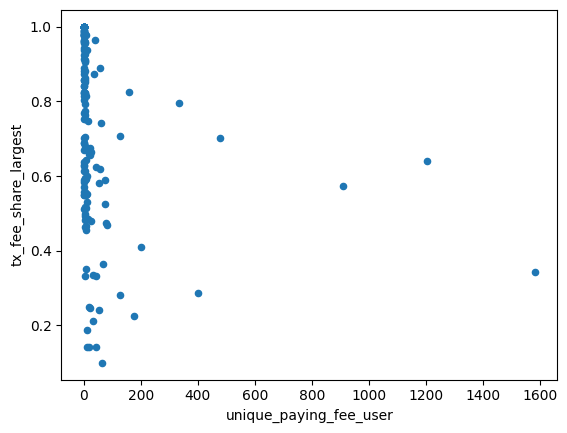

In [169]:
tx_fee_share_largest_test.plot(kind="scatter", x="unique_paying_fee_user", y="tx_fee_share_largest")

In [36]:
df_stata = pd.read_stata("C:/Users/zxz170017/uniswap_20241005.dta")

In [44]:
df_nf_position_managers = df_stata["nf_position_manager_address"].unique()
test_res_merged_copy = test_res_merged.copy()
test_res_merged_copy = test_res_merged_copy[test_res_merged_copy["nf_position_manager_address"].isin(df_nf_position_managers)]
df_stata_new_temp = df_stata.merge(test_res_merged_copy, on="nf_position_manager_address", how="left")

In [93]:
df_stata.merge(tx_fee_share_largest_test, on="nf_position_manager_address", how="left").to_csv("C:/Users/zxz170017/uniswap_20241007_new.csv", index=False)

In [102]:
multiple_positions_new_cond = action_df_final.groupby(["position_id"]).agg(
    max_date=("block_timestamp", "max"),
    min_date=("block_timestamp", "min"),
    mpz=("liquidity_mpz", "sum")
).reset_index()
multiple_positions_new_cond["time_diff"] = (
        multiple_positions_new_cond["max_date"] - multiple_positions_new_cond["min_date"])
new_cond_for_position = (multiple_positions_new_cond["time_diff"] <= '12 hours') & (
        multiple_positions_new_cond["mpz"] == 0)
ok_ids_new = multiple_positions_new_cond[~new_cond_for_position]["position_id"].unique()

In [103]:
action_df_final.columns

Index(['block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'tick_lower', 'tick_upper', 'price_lower_1_0', 'price_upper_1_0',
       'price_lower_0_1', 'price_upper_0_1', 'price_lower_1_0_usd',
       'price_upper_1_0_usd', 'price_lower_0_1_usd', 'price_upper_0_1_usd',
       'tx_fee', 'from_address', 'to_address', 'token_id', 'liquidity_mpz',
       'position_id', 'custom_id', 'USING_UNI_STRICT', 'USING_UNI_RELAXED',
       'Unnamed: 0'],
      dtype='object')

In [104]:
action_df_mapping = action_df_final[action_df_final["position_id"].isin(ok_ids_new)].copy()
action_df_mapping["sc"] = action_df_mapping["nf_position_manager_address"].isin(unique_smart_contract_addresses)
action_df_mapping = action_df_mapping[["position_id", "nf_position_manager_address", "sc"]].copy()

In [96]:
ret_data_sc = ret_data[ret_data["sc"] == 1].copy()

In [106]:
sc_res = ret_data[ret_data["sc"] == 1].copy()
sc_position_mapping = action_df_mapping[action_df_mapping["sc"] == 1].copy()
sc_position_mapping_new = sc_position_mapping.drop_duplicates(subset=["position_id"])[["position_id", "nf_position_manager_address"]].copy()

In [113]:
# agg into SC weekly level
#grp_by_condition = sc_temp_res_test.groupby(["pool_address", "week", "liquidity_provider", "nf_position_manager_address"])

Index(['position_id', 'week', 'amount_last_temp', 'amount_temp', 'fee',
       'amount_input', 'amount_output', 'sc', 'active_perc',
       'complete_removal', 'not_first', 'amount_last_new', 'amount_new',
       'amt_roi_new', 'fee_roi_new', 'overall_roi_new', 'pool_address', 'low',
       'high', 'open', 'close', 'low_tick', 'high_tick', 'open_tick',
       'close_tick', 'volume_crypto_abs', 'volume_stable_abs',
       'volume_crypto_net', 'volume_stable_net', 'volume_usd',
       'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt'],
      dtype='object')

In [14]:
ret_data_sc.groupby("pool_address")["position_id"].nunique()

pool_address
0x11b815efb8f581194ae79006d24e0d814b7697f6     204
0x4e68ccd3e89f51c3074ca5072bbac773960dfa36     975
0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5       5
0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640    1072
0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8    1972
0x99ac8ca7087fa4a2a1fb6357269965a2014abc35     354
0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8     157
Name: position_id, dtype: int64

In [17]:
ret_data_sc["overall_roi_new"].describe()

count    1.948900e+04
mean     9.950030e-01
std      8.558895e-02
min      3.827027e-07
25%      9.792416e-01
50%      1.000000e+00
75%      1.017081e+00
max      1.567854e+00
Name: overall_roi_new, dtype: float64

In [114]:
ownership_percentage_new = pd.read_csv(os.path.join(data_folder_path, "01_original_data", "sc_ownership", 'ownership_result0916.csv'))

In [109]:
sc_position_mapping_new

,position_id,nf_position_manager_address
9439,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22---1...,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22
9480,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22---1...,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22
9488,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22---2...,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22
9499,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22---2...,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22
9507,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22---2...,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22
...,...,...
345009,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69---7...,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69
345012,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69---7...,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69
345015,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69---8...,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69
345026,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69---8...,0x810f9c4613f466f02cc7da671a3ba9a7e8c33c69


In [115]:
sc_position_mapping_new_position_ids = sc_position_mapping_new["position_id"].unique()

In [116]:
sc_res_with_creator_ids = sc_res.merge(sc_position_mapping_new, on="position_id", how="left")

In [122]:
sc_addrs = ownership_percentage_new["nf_position_manager_address"].unique()
sc_res_filterd = sc_res_with_creator_ids[sc_res_with_creator_ids["nf_position_manager_address"].isin(sc_addrs)]
grp_by_condition_per_sc = sc_res_filterd.groupby(["pool_address", "week", "nf_position_manager_address"])

In [123]:
sc_res_filterd.columns

Index(['position_id', 'week', 'amount_last_temp', 'amount_temp', 'fee',
       'amount_input', 'amount_output', 'sc', 'active_perc',
       'complete_removal', 'not_first', 'amount_last_new', 'amount_new',
       'amt_roi_new', 'fee_roi_new', 'overall_roi_new', 'pool_address', 'low',
       'high', 'open', 'close', 'low_tick', 'high_tick', 'open_tick',
       'close_tick', 'volume_crypto_abs', 'volume_stable_abs',
       'volume_crypto_net', 'volume_stable_net', 'volume_usd',
       'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt',
       'nf_position_manager_address'],
      dtype='object')

In [125]:
per_sc_per_pool_performance = grp_by_condition_per_sc.agg(
    amount_last = ("amount_last_new", "sum"),
    amount_new = ("amount_new", "sum"),
    fee = ("fee", "sum"),
).reset_index()

In [127]:
per_sc_per_pool_performance["fee_roi_sc"] = per_sc_per_pool_performance["fee"] / per_sc_per_pool_performance["amount_last"]
per_sc_per_pool_performance["amt_roi_sc"] = per_sc_per_pool_performance["amount_new"] / per_sc_per_pool_performance["amount_last"]
per_sc_per_pool_performance["overall_roi_sc"] = per_sc_per_pool_performance["amt_roi_sc"] + per_sc_per_pool_performance["fee_roi_sc"]
per_sc_per_pool_performance["fee_vs_amt_sc"] = per_sc_per_pool_performance["fee_roi_sc"] / (per_sc_per_pool_performance["overall_roi_sc"] - 1)


In [135]:
df_stata["week_date"].astype(str)

0         2021-05-02
1         2021-05-02
2         2021-05-02
3         2021-05-02
4         2021-05-02
             ...    
816762    2022-12-25
816763    2022-12-25
816764    2022-12-25
816765    2022-12-25
816766    2022-12-25
Name: week_date, Length: 816767, dtype: object

In [138]:
df_stata["week_date_merge"] = df_stata["week_date"].astype(str)
per_sc_per_pool_performance["week_date_merge"] = per_sc_per_pool_performance["week"].astype(str)

In [150]:
tx_fee_share_largest_test

,nf_position_manager_address,tx_fee_share_largest,unique_paying_fee_user
0,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,0.465394,7
1,0x0084b08552cfb411b2acb63ac913a88dd1caf771,1.000000,1
2,0x00ee439c1e45c942721ca837538a2fee0a5d74aa,0.980289,2
3,0x026ebe349f96077660138f0e7d7d448a3320c866,1.000000,1
4,0x0507856599f598d2aa070c4286d296cd7ef7af9a,0.813815,2
...,...,...,...
226,0xf62e68f86fe080bbcce2ba16f771fb2bd395dc48,1.000000,1
227,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,0.958088,4
228,0xf874d4957861e193aec9937223062679c14f9aca,0.641805,7
229,0xfd4c9a491dd777b8b3e13659e9e379252ec78390,0.675700,22


In [163]:
tx_fee_share_largest_filtered = tx_fee_share_largest_test[tx_fee_share_largest_test["nf_position_manager_address"].isin(df_stata["nf_position_manager_address"].unique())].copy()

c:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='unique_paying_fee_user', ylabel='tx_fee_share_largest'>

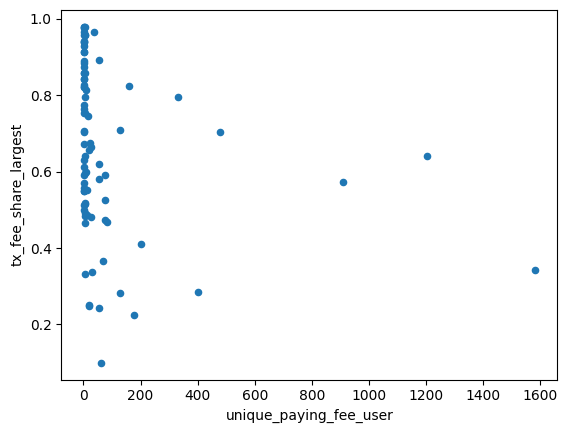

In [171]:
tx_fee_share_largest_filtered_new = tx_fee_share_largest_test[tx_fee_share_largest_test["nf_position_manager_address"].isin(df_stata["nf_position_manager_address"].unique())].copy()
tx_fee_share_largest_filtered_new[tx_fee_share_largest_filtered_new["unique_paying_fee_user"] > 1].plot(kind="scatter", x="unique_paying_fee_user", y="tx_fee_share_largest")

<Axes: xlabel='unique_paying_fee_user', ylabel='tx_fee_share_largest'>

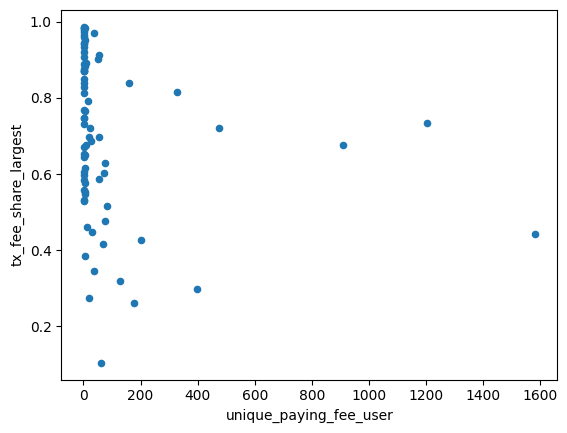

In [170]:
tx_fee_share_largest_filtered[tx_fee_share_largest_filtered["unique_paying_fee_user"] > 1].plot(kind="scatter", x="unique_paying_fee_user", y="tx_fee_share_largest")

In [172]:
tx_fee_share_largest_filtered_new.sort_values(by="unique_paying_fee_user", ascending=False)


,nf_position_manager_address,tx_fee_share_largest,unique_paying_fee_user
172,0xbd7c6d2ede836b6b27c461799c4e9ecb8f4e8a66,0.342969,1581
135,0x9bf7b46c7ad5ab62034e9349ab912c0345164322,0.639919,1202
214,0xe72f3e105e475d7db3a003ffa377afae9c2c6c11,0.573800,910
134,0x9a98bffabc0abf291d6811c034e239e916bbcec0,0.703377,478
198,0xd63b340f6e9cccf0c997c83c8d036fa53b113546,0.286264,400
...,...,...,...
160,0xb2041768490cb1e189a484cbaa7d252e57b69104,1.000000,1
27,0x2653dd498c241033c6d19282c61d806434f1859a,1.000000,1
24,0x215852cc03263496969d8a5daa96f569b176771f,1.000000,1
165,0xb60f4ac1514be672b2ec35a023f4c89373d3a4ef,1.000000,1


In [153]:
tx_fee_share_largest_filtered.to_csv("C:/Users/zxz170017/uniswap_20241007_new_sc_performance_tx_fee_share_largest.csv", index=False)


In [139]:
df_stata.merge(per_sc_per_pool_performance, on=["nf_position_manager_address", "pool_address", "week_date_merge"], how="left").merge(tx_fee_share_largest_test, on="nf_position_manager_address", how="left").to_csv("C:/Users/zxz170017/uniswap_20241007_new_sc_performance.csv", index=False)

In [23]:
sc_res_merged_maybe = sc_res_filterd.merge(ownership_percentage_new, on=["nf_position_manager_address","week"], how="left")

In [24]:
sc_res_merged_maybe.columns

Index(['position_id', 'week', 'amount_last_temp', 'amount_temp', 'fee',
       'amount_input', 'amount_output', 'sc', 'active_perc',
       'complete_removal', 'not_first', 'amount_last_new', 'amount_new',
       'amt_roi_new', 'fee_roi_new', 'overall_roi_new', 'pool_address', 'low',
       'high', 'open', 'close', 'low_tick', 'high_tick', 'open_tick',
       'close_tick', 'volume_crypto_abs', 'volume_stable_abs',
       'volume_crypto_net', 'volume_stable_net', 'volume_usd',
       'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt',
       'nf_position_manager_address', 'liquidity_provider',
       'percentage_ownership'],
      dtype='object')

In [64]:
non_sc_position_mapping = action_df_final[action_df_final["position_id"].isin(ok_ids_new)].copy()
non_sc_position_mapping = non_sc_position_mapping[~non_sc_position_mapping["nf_position_manager_address"].isin(unique_smart_contract_addresses)].copy()
non_sc_position_mapping = non_sc_position_mapping[["position_id", "liquidity_provider"]].copy()
non_sc_res = ret_data[ret_data["sc"] == 0].copy()
non_sc_res["nf_position_manager_address"] = "dummy"
non_sc_res["percentage_ownership"] = 1
non_sc_res_final = non_sc_res.merge(non_sc_position_mapping, on="position_id", how="left")


In [78]:
non_sc_res_final.shape


(2440400, 37)

In [79]:
sc_res_merged_maybe.shape

(1518321, 37)

In [81]:
final_data_test = pd.concat([sc_res_merged_maybe, non_sc_res_final], ignore_index=True)


In [82]:
final_data_test.to_csv("0917_final_data_test.csv", index=False)

In [59]:
sc_temp_res_test = sc_res_merged_maybe.copy()
sc_temp_res_test["amount_last_new_actual"] = sc_temp_res_test["amount_last_new"] * sc_temp_res_test["percentage_ownership"]
sc_temp_res_test["amount_new_actual"] = sc_temp_res_test["amount_new"] * sc_temp_res_test["percentage_ownership"]
sc_temp_res_test["fee_actual"] = sc_temp_res_test["fee"] * sc_temp_res_test["percentage_ownership"]

In [66]:
res_non_sc = non_sc_res_final.groupby(["pool_address", "week", "liquidity_provider"]).agg(
    amount_last = ("amount_last_new", "sum"),
    amount_new = ("amount_new", "sum"),
    fee = ("fee", "sum"),
).reset_index()

In [72]:
res_non_sc["nf_position_manager_address"] = "dummy"
res_non_sc["percentage_ownership_avg"] = 1


In [60]:
grp_by_condition = sc_temp_res_test.groupby(["pool_address", "week", "liquidity_provider", "nf_position_manager_address"])

In [61]:
ret_result = grp_by_condition.agg(
    amount_last = ("amount_last_new_actual", "sum"),
    amount_new = ("amount_new_actual", "sum"),
    fee = ("fee_actual", "sum"),
    percentage_ownership_avg = ("percentage_ownership", "mean"),
).reset_index()

In [35]:
ret_result.to_csv("0930_ret_result.csv", index=False)


In [38]:
sc_action_df = action_df_final[action_df_final["position_id"].isin(sc_position_mapping_new_position_ids)]

Index(['block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'tick_lower', 'tick_upper', 'price_lower_1_0', 'price_upper_1_0',
       'price_lower_0_1', 'price_upper_0_1', 'price_lower_1_0_usd',
       'price_upper_1_0_usd', 'price_lower_0_1_usd', 'price_upper_0_1_usd',
       'tx_fee', 'from_address', 'to_address', 'token_id', 'liquidity_mpz',
       'position_id', 'custom_id', 'USING_UNI_STRICT', 'USING_UNI_RELAXED',
       'Unnamed: 0'],
      dtype='object')

In [87]:
sc_action_df_copy = sc_action_df.copy()

sc_action_df_copy["week"] = pd.to_datetime(sc_action_df_copy["block_timestamp"]).dt.to_period('W-SAT').dt.start_time.astype(str)
from_address_cnt = sc_action_df_copy.groupby(["nf_position_manager_address", "week"]).agg(
    total_interacted_through = ("from_address", "nunique"),
).reset_index()
sc_user_cnt = ownership_percentage_new.groupby(["nf_position_manager_address", "week"]).agg(
    unique_lps = ("liquidity_provider", "nunique"),
).reset_index()
user_usage_data = sc_user_cnt.merge(from_address_cnt, on=["nf_position_manager_address", "week"], how="left")

In [89]:
# replace nan with 0
user_usage_data = user_usage_data.fillna(0)
user_usage_data.to_csv("0930_user_usage_data_try2.csv", index=False)

In [90]:
user_usage_data

,nf_position_manager_address,week,unique_lps,total_interacted_through
0,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,2022-04-03,1,1.0
1,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,2022-04-10,1,1.0
2,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,2022-04-17,1,1.0
3,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,2022-04-24,1,0.0
4,0x00608b2230fbcd2b85cf8506006979a3a888ebdf,2022-05-01,1,1.0
...,...,...,...,...
5917,0xfe9d3a1e865b9eaea9cd1d9d9073cc520be240c5,2022-11-27,1,0.0
5918,0xfe9d3a1e865b9eaea9cd1d9d9073cc520be240c5,2022-12-04,1,0.0
5919,0xfe9d3a1e865b9eaea9cd1d9d9073cc520be240c5,2022-12-11,1,0.0
5920,0xfe9d3a1e865b9eaea9cd1d9d9073cc520be240c5,2022-12-18,1,0.0


In [47]:
sc_user_cnt.merge(from_address_cnt, on=["nf_position_manager_address", "week"], how="left").to_csv("0930_sc_user_cnt.csv", index=False)


In [53]:
test_res = sc_user_cnt.merge(from_address_cnt, on="nf_position_manager_address", how="left")

In [91]:
test_res["ratio"] = test_res["total_interacted_through"] / test_res["unique_lps"]
user_usage_data["ratio"] = user_usage_data["total_interacted_through"] / user_usage_data["unique_lps"]


In [62]:
ret_result.merge(test_res[["nf_position_manager_address", "ratio"]], on="nf_position_manager_address", how="left").to_csv("0930_ret_result_with_ratio.csv", index=False)

In [92]:
sc_half = ret_result.merge(user_usage_data[["nf_position_manager_address", "ratio", "week"]],  on=["nf_position_manager_address", "week"], how="left")

In [93]:
sc_half.columns

Index(['pool_address', 'week', 'liquidity_provider',
       'nf_position_manager_address', 'amount_last', 'amount_new', 'fee',
       'percentage_ownership_avg', 'ratio'],
      dtype='object')

In [74]:
res_non_sc["ratio"] = 1
res_non_sc.columns

Index(['pool_address', 'week', 'liquidity_provider', 'amount_last',
       'amount_new', 'fee', 'nf_position_manager_address',
       'percentage_ownership', 'percentage_ownership_avg', 'ratio'],
      dtype='object')

In [94]:
pd.concat([res_non_sc[['pool_address', 'week', 'liquidity_provider',
       'nf_position_manager_address', 'amount_last', 'amount_new', 'fee',
       'percentage_ownership_avg', 'ratio']], sc_half], ignore_index=True).merge(weekly_prices, on=["week", "pool_address"], how="left").to_csv("0930_final_data_test_everyone.csv", index=False)

In [96]:
user_usage_data[user_usage_data["ratio"] > 0].describe()

,unique_lps,total_interacted_through,ratio
count,1389.000000,1389.000000,1389.000000
mean,149.388769,8.740821,0.388955
std,261.940099,21.221636,0.549970
min,1.000000,1.000000,0.001984
25%,4.000000,1.000000,0.040000
50%,18.000000,2.000000,0.157895
75%,156.000000,6.000000,0.555556
max,1277.000000,279.000000,6.000000
